In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
runs =[
    "run-no-ambig", "run-with-ambig", "run-general-ambig",
    "run-no-ambig-0.05-expand", "run-with-ambig-0.05-expand", "run-general-ambig-0.05-expand",
    "run-no-ambig-0.2-expand", "run-with-ambig-0.2-expand", "run-general-ambig-0.2-expand",
    "run-cg-with-lig", "run-water-refine", "run-cg-water"
]  

succes_list = ['3J95', '3J96', '5GRS', '5HNY', '5WCB', '6ACG', '6AHF', '6IRF', '6N1Q', '6N7G', '6N8Z', '6R7I', '6UBY', '6UC0']

tick_label_dict ={
    "run-no-ambig" : "it1 nr",
    "run-with-ambig" : "it1 sr",
    "run-general-ambig" : "it1 gr",
    "run-no-ambig-0.05-expand" : "it1 nr 0.05 exp",
    "run-with-ambig-0.05-expand" : "it1 sr 0.05 exp",
    "run-general-ambig-0.05-expand" : "it1 sr 0.05 exp",
    "run-no-ambig-0.2-expand" : "it1 nr 0.2 exp",
    "run-with-ambig-0.2-expand" : "it1 sr 0.2 exp",
    "run-general-ambig-0.2-expand" : "it1 gr 0.2 exp",
    "run-cg" : "coarse grained",
    "run-cg2" : "coarse grained 2",
    "run-cg-with-lig" : "cg",
    "run-water-refine" : "MD in water",
    'run-no-ambig-0.05-expand-EM' : "it1 no restraints 0.05 expand EM",
    'run-with-ambig-0.05-expand-EM' : "it1 with restraints 0.05 expand EM",
    'run-general-ambig-0.05-expand-EM' : "it1 general restraints 0.05 expand EM",
    "run-cg-water" : "cg + MD in water",
    "run-general-ambig-EM" : "it1 gr + EM"
}

def make_tick_labels(runs):
    tick_labels = []
    for run in runs:
        tick_labels.append(tick_label_dict[run])
    return tick_labels

In [3]:
def get_ref_molprob():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("analysis/reference-molprob.csv", index_col = 0)
  
    return ref_df

def make_molprob_df(run):
    run = "analysis_{}".format(run)
    
    df_3J95 = pd.read_csv(("analysis/{}/3J95_molprob.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("analysis/{}/3J96_molprob.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("analysis/{}/5GRS_molprob.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("analysis/{}/5HNY_molprob.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("analysis/{}/5WCB_molprob.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("analysis/{}/6ACG_molprob.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("analysis/{}/6AHF_molprob.csv").format(run), index_col = "structure")
    df_6C06 = pd.read_csv(("analysis/{}/6C06_molprob.csv").format(run), index_col = "structure")
    df_6C3P = pd.read_csv(("analysis/{}/6C3P_molprob.csv").format(run), index_col = "structure")
    df_6ENY = pd.read_csv(("analysis/{}/6ENY_molprob.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("analysis/{}/6IRF_molprob.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("analysis/{}/6N1Q_molprob.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("analysis/{}/6N7G_molprob.csv").format(run), index_col = "structure")
    df_6N8T = pd.read_csv(("analysis/{}/6N8T_molprob.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("analysis/{}/6N8Z_molprob.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("analysis/{}/6R7I_molprob.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("analysis/{}/6UBY_molprob.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("analysis/{}/6UC0_molprob.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6C06,
        df_6C3P,
        df_6ENY,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8T,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [4]:
def combine_dfs(analyzer):
    final_df = pd.DataFrame()
    for run in runs:
        df_list = make_molprob_df(run)
        data_frame = pd.DataFrame()
        for df in iter(df_list):
            if df.shape[0] != 0:
                structure = df.index[0][:4]
                if structure in succes_list:
                    df = df.sort_values("HADDOCK-score").reset_index().drop("structure", axis=1)
#                     df = df.sub(ref_df.loc[structure, analyzer])
                    data_frame = pd.concat([data_frame, df[analyzer]], ignore_index=True)
        final_df = pd.concat([final_df, data_frame], axis=1, ignore_index=True)
    return final_df



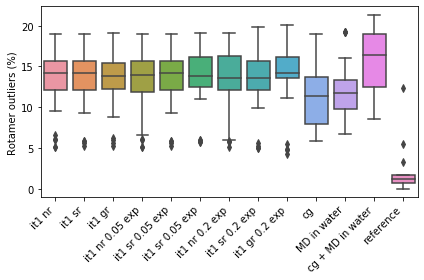

In [5]:
analyzer = "rotameroutliers"
ana_df = combine_dfs(analyzer)
ref_df = get_ref_molprob()
ref_df = ref_df.loc[succes_list, analyzer]
df = pd.concat([ana_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Rotamer outliers (%)")
plt.tight_layout()
# plt.savefig("Rotamer-all", dpi=350)

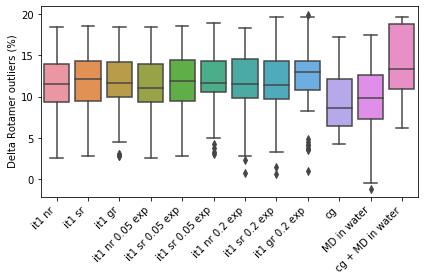

In [6]:
i = 0
new_df = pd.DataFrame()
while i < ana_df.shape[0]:
    ana_slice = ana_df[i:i+4].sub(ref_df.iloc[int(i/4)])
    new_df = pd.concat([new_df, ana_slice])
    
    i += 4
df = new_df
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel(" Delta Rotamer outliers (%)")
plt.tight_layout()

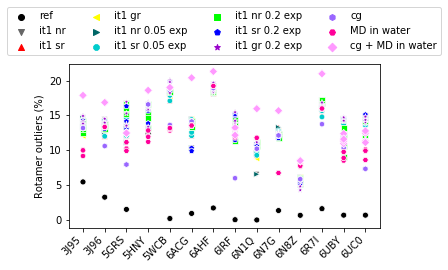

In [7]:
j = 0
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(ana_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < ana_df.shape[0]:
        part = ana_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

colors = [
    "#000000",
    "#666666",
    "#FF0000",
    "#FFFF00",
    "#006666",
    "#00CCCC",
    "#00FF00",
    "#0000FF",
    "#9900CC",
    "#9966FF",
    "#FF0099",
    "#FF99FF"
]    

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plot = sns.scatterplot(data=all_df, markers=filled_markers, palette=colors)
plot.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plot.set_xticklabels(succes_list, rotation=45, ha="right")
plot.set_ylabel("Rotamer outliers (%)")
plt.tight_layout()
plt.savefig("Rotamer-each", dpi = 350)


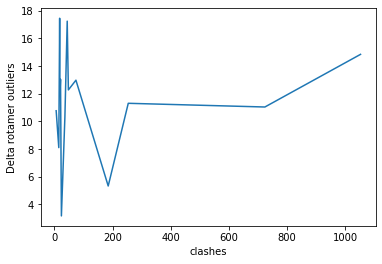

In [8]:
j = 0
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(new_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < new_df.shape[0]:
        part = new_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

ana_df = all_df.drop("ref", axis = 1)
header = ["Delta rotamer outliers"]
ana_df = pd.DataFrame(ana_df.mean(axis = 1 ), columns=header)
clashes = pd.read_csv("analysis/reference-clashes.csv", index_col = 0).loc[succes_list]
combined = pd.concat([ana_df, clashes], axis = 1).sort_values("clashes")
sns.lineplot(x=combined["clashes"], y=combined["Delta rotamer outliers"])



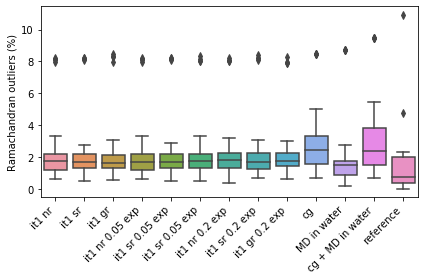

In [9]:
analyzer = "ramaoutliers"
rama_df = combine_dfs(analyzer)
ref_df = get_ref_molprob()
ref_df = ref_df.loc[succes_list, analyzer]
df = pd.concat([rama_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Ramachandran outliers (%)")
plt.tight_layout()
# plt.savefig("Rama-all", dpi=350)

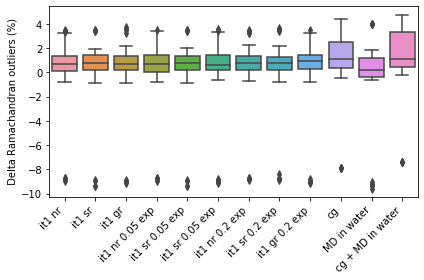

In [10]:
i = 0
new_df = pd.DataFrame()
while i < rama_df.shape[0]:
    ana_slice = rama_df[i:i+4].sub(ref_df.iloc[int(i/4)])
    new_df = pd.concat([new_df, ana_slice])
    
    i += 4
df = new_df
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel(" Delta Ramachandran outliers (%)")
plt.tight_layout()

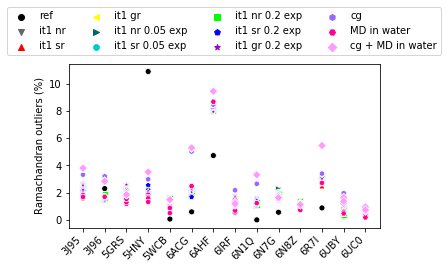

In [11]:
j = 0
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(rama_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < rama_df.shape[0]:
        part = rama_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

colors = [
    "#000000",
    "#666666",
    "#FF0000",
    "#FFFF00",
    "#006666",
    "#00CCCC",
    "#00FF00",
    "#0000FF",
    "#9900CC",
    "#9966FF",
    "#FF0099",
    "#FF99FF"
]    

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plot = sns.scatterplot(data=all_df, markers=filled_markers, palette=colors)
plot.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plot.set_xticklabels(succes_list, rotation=45, ha="right")
plot.set_ylabel("Ramachandran outliers (%)")
plt.tight_layout()

plt.savefig('rama-each', dpi = 350)

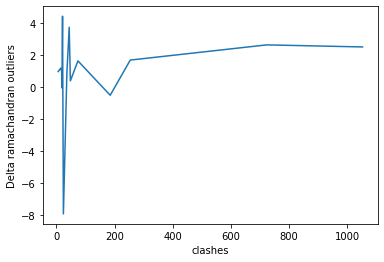

In [12]:
j = 0
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(new_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < new_df.shape[0]:
        part = new_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

ana_df = all_df.drop("ref", axis = 1)
header = ["Delta ramachandran outliers"]
ana_df = pd.DataFrame(ana_df["cg"].mean(axis = 1), columns=header)
clashes = pd.read_csv("analysis/reference-clashes.csv", index_col = 0).loc[succes_list]
combined = pd.concat([ana_df, clashes], axis = 1).sort_values("clashes")
sns.lineplot(x=combined["clashes"], y=combined["Delta ramachandran outliers"])


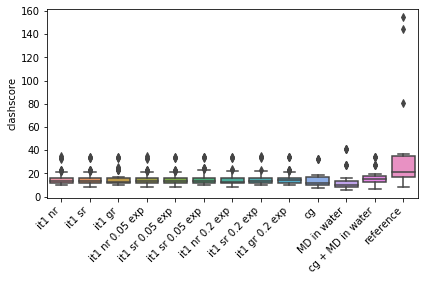

In [13]:
analyzer = "clashscore"
rama_df = combine_dfs(analyzer)
ref_df = get_ref_molprob()
ref_df = ref_df.loc[succes_list, analyzer]
df = pd.concat([rama_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("clashscore")

plt.tight_layout()
# plt.savefig("clashscore-all", dpi=350)

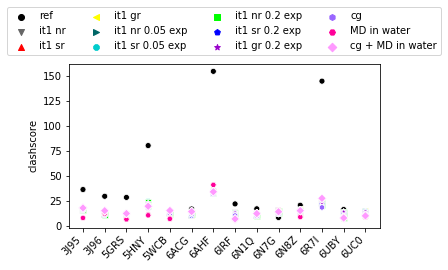

In [14]:
j = 0
all_df = pd.DataFrame()
ref_df = pd.DataFrame(ref_df.values, columns=["ref"])
ref_df.set_index([succes_list], inplace=True)
all_df = pd.concat([all_df, ref_df], axis = 1)

for i in range(rama_df.shape[1]):
    j = 0
    df = pd.DataFrame()
    while j < rama_df.shape[0]:
        part = rama_df.iloc[j:j+4, i]
        df = pd.concat([df, part.reset_index().drop("index", axis=1)], axis=1, )
        j += 4
    df = pd.DataFrame.transpose(df)
    column = xticks[i]
    df = pd.DataFrame(df.values, columns=[column, column, column, column])
    df.set_index([succes_list], inplace=True)
    all_df = pd.concat([all_df, df], axis = 1)

    
colors = [
    "#000000",
    "#666666",
    "#FF0000",
    "#FFFF00",
    "#006666",
    "#00CCCC",
    "#00FF00",
    "#0000FF",
    "#9900CC",
    "#9966FF",
    "#FF0099",
    "#FF99FF"
]

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plot = sns.scatterplot(data=all_df, markers=filled_markers, palette=colors)
plot.legend(loc='center', bbox_to_anchor=(0.5, 1.2), ncol=4)
plot.set_xticklabels(succes_list, rotation=45, ha="right")
plot.set_ylabel("clashscore")
plt.tight_layout()
plt.savefig('clash-each', dpi = 350)